In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('./dataset.csv')

In [3]:
#comenzamos viendo el Dataset luego de haber hecho las transformacionesnes en el ETL.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173 entries, 0 to 26172
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        26173 non-null  object 
 1   overview      26115 non-null  object 
 2   popularity    26173 non-null  float64
 3   title         26173 non-null  object 
 4   vote_average  26173 non-null  float64
 5   vote_count    26173 non-null  float64
 6   release_year  26173 non-null  int64  
 7   actors        26173 non-null  object 
 8   director      26173 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.8+ MB


In [4]:
#Las columnas que tienen listas, se corrigen para pasarlas de cadenas y tratarlas como listas

df['actors'] = df['actors'].apply(lambda x: ast.literal_eval(x))
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df['director'] = df['director'].apply(lambda x: ast.literal_eval(x))

In [6]:
#Verificacion de Valores Faltantes 
df.isnull().sum()

budget                    0
genres                    0
id                        0
original_language         0
overview                 68
popularity                0
production_companies    241
release_date              0
revenue                   0
status                    0
title                     0
vote_average              0
vote_count                0
release_year              0
return                    0
actors                    0
director                  0
dtype: int64

In [7]:
#los valores nulos de la columna "overview" y "production_companies" de convierten en cadenas vacias
df.loc[df["overview"].isnull(),"overview"] = ""
df.loc[df["production_companies"].isnull(),"production_companies"] = ""

EXPLORAR EL DATASET PARA PODER CREAR EL MODELO

In [8]:
df.describe()

,budget,id,popularity,release_date,revenue,vote_average,vote_count,release_year,return
count,3.225600e+04,32256.000000,32256.000000,32256,3.225600e+04,32256.000000,32256.000000,32256.000000,3.225600e+04
mean,5.618409e+06,103943.929905,3.373446,1991-08-15 17:55:50.892857088,1.518191e+07,5.496367,141.661613,1991.132378,7.982206e+02
min,0.000000e+00,5.000000,0.000000,1878-06-14 00:00:00,0.000000e+00,0.000000,0.000000,1878.000000,0.000000e+00
25%,0.000000e+00,23998.750000,0.411410,1978-05-08 18:00:00,0.000000e+00,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,53901.500000,1.262034,2000-12-31 00:00:00,0.000000e+00,5.900000,10.000000,2000.000000,0.000000e+00
75%,0.000000e+00,149338.750000,4.829591,2010-10-08 00:00:00,0.000000e+00,6.700000,43.000000,2010.000000,0.000000e+00
max,3.800000e+08,467731.000000,547.488298,2020-12-16 00:00:00,2.787965e+09,10.000000,14075.000000,2020.000000,1.239638e+07
std,2.030804e+07,110844.396860,6.879701,NaN,7.559053e+07,1.932807,574.672067,24.719313,8.545274e+04


EXPLORAMOS LOS GENEROS PARA VER COMO INTERACTUAN CON OTRAS VARIABLES COMO 'POPULARITY' Y 'VOTE_AVERAGE'

In [9]:
#DESENCADENA LAS LISTAS PARA CONVERTIR CADA ELEMENTO DE LA LISTA EN UNA FILA DENTRO DEL DATAFRAME

In [10]:
#GRAFICAR LAS RELACIONES DE POPULARIDAD Y VOTO_AVERAGE POR GENERO
df_avr_1 = df.explode('genres').groupby('genres')['popularity'].mean().reset_index()
df_avr_2 = df.explode('genres').groupby('genres')['vote_average'].mean().reset_index()
df_avr_1 = df_avr_1.sort_values(by='popularity', ascending=False)
df_avr_2 = df_avr_2.sort_values(by='vote_average', ascending=False)



C:\Users\argen\AppData\Local\Temp\ipykernel_10624\595287228.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot( x='genres', y='popularity', data=df_avr_1, hue='popularity', color='blue')


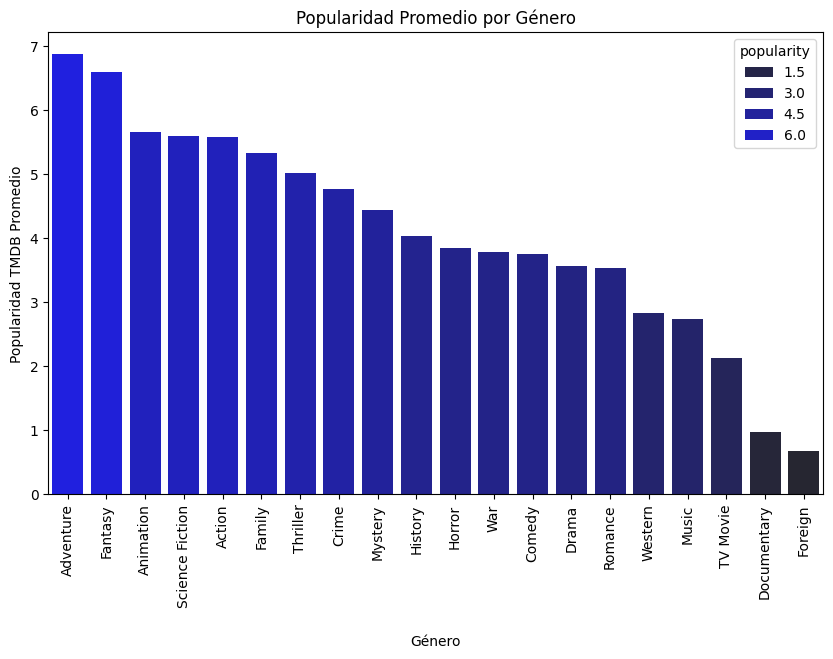

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot( x='genres', y='popularity', data=df_avr_1, hue='popularity', color='blue')
plt.xlabel('Género',   rotation=0, labelpad=20)
plt.ylabel('Popularidad TMDB Promedio')
plt.title('Popularidad Promedio por Género')
plt.xticks(rotation=90)
plt.show()

C:\Users\argen\AppData\Local\Temp\ipykernel_10624\2559849134.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x='genres', y='vote_average', data=df_avr_2, hue='vote_average', color='blue')


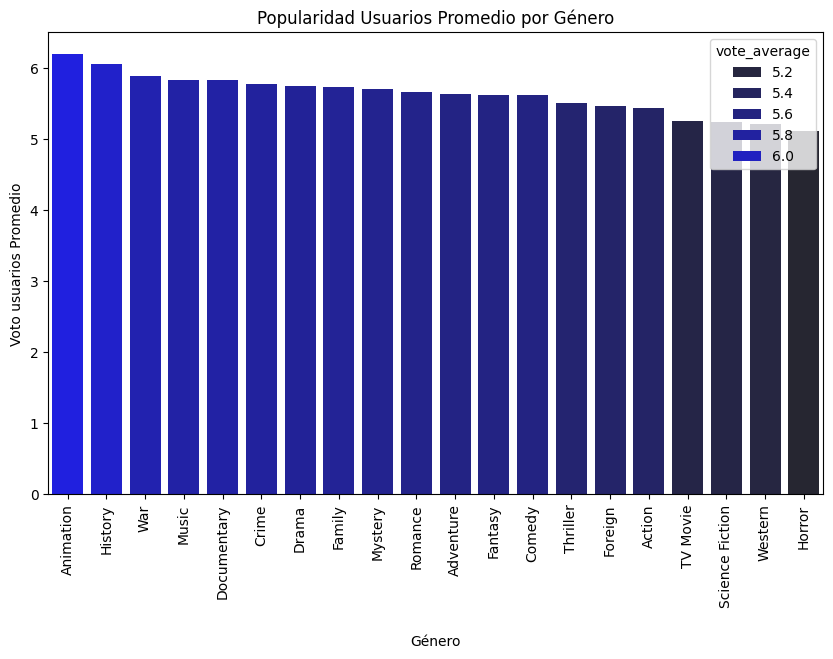

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genres', y='vote_average', data=df_avr_2, hue='vote_average', color='blue')
plt.xlabel('Género',   rotation=0, labelpad=20)
plt.ylabel('Voto usuarios Promedio')
plt.title('Popularidad Usuarios Promedio por Género')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Convertir la columna 'genero' en variables binarias
df_genres = df['genres'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
df = pd.concat([df, df_genres], axis=1).drop(columns=['genres'])

In [16]:
#Graficar canrtidad de Peliculas Genero

In [17]:
df_genres = df[["Animation", "Comedy", "Family", "Adventure", "Fantasy", "Romance", "Drama", "Action", "Crime", 
                "Thriller", "Horror", "History", "Mystery","War", "Music", "Documentary", "Foreign","Western"]].sum()
df_genres = df_genres.reset_index()
df_genres.columns = ['genre', 'value']

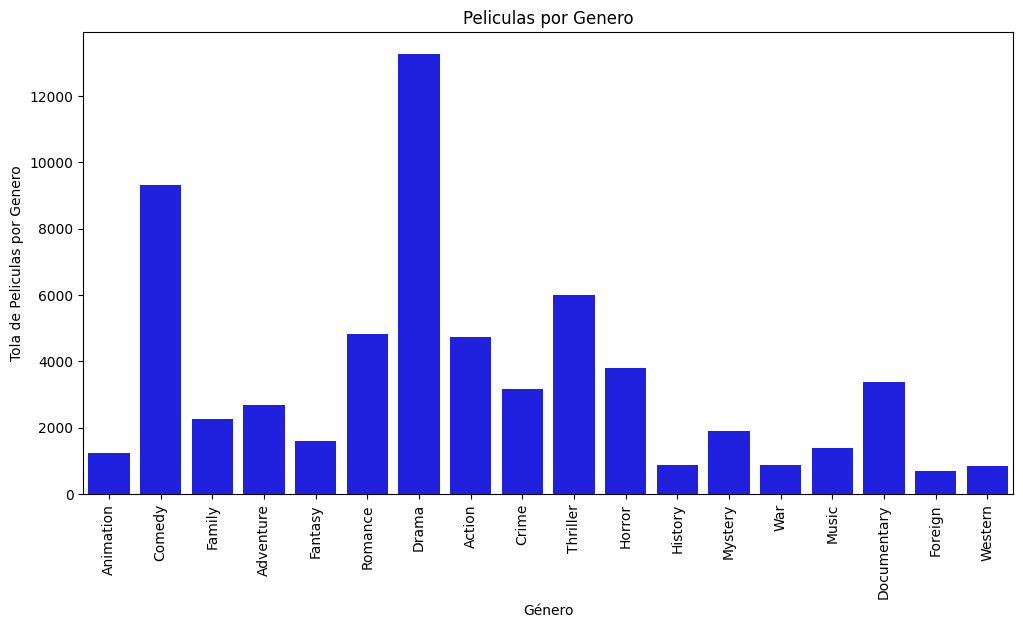

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='value', data=df_genres, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Género')
plt.ylabel('Tola de Peliculas por Genero')
plt.title('Peliculas por Genero')

# Mostrar la gráfica
plt.show()

In [19]:
#Revisar si exite una correlacion entre los Generos y las columans 'Popularity', 'revenue' y vote_average

In [20]:
corr = df[["Animation", "Comedy", "Family", "Adventure", "Fantasy", "Romance", "Drama", "Action", "Crime", "Thriller", "Horror", "History", "Mystery","War", "Music", "Documentary", "Foreign","Western","popularity","vote_average","return"]].corr()

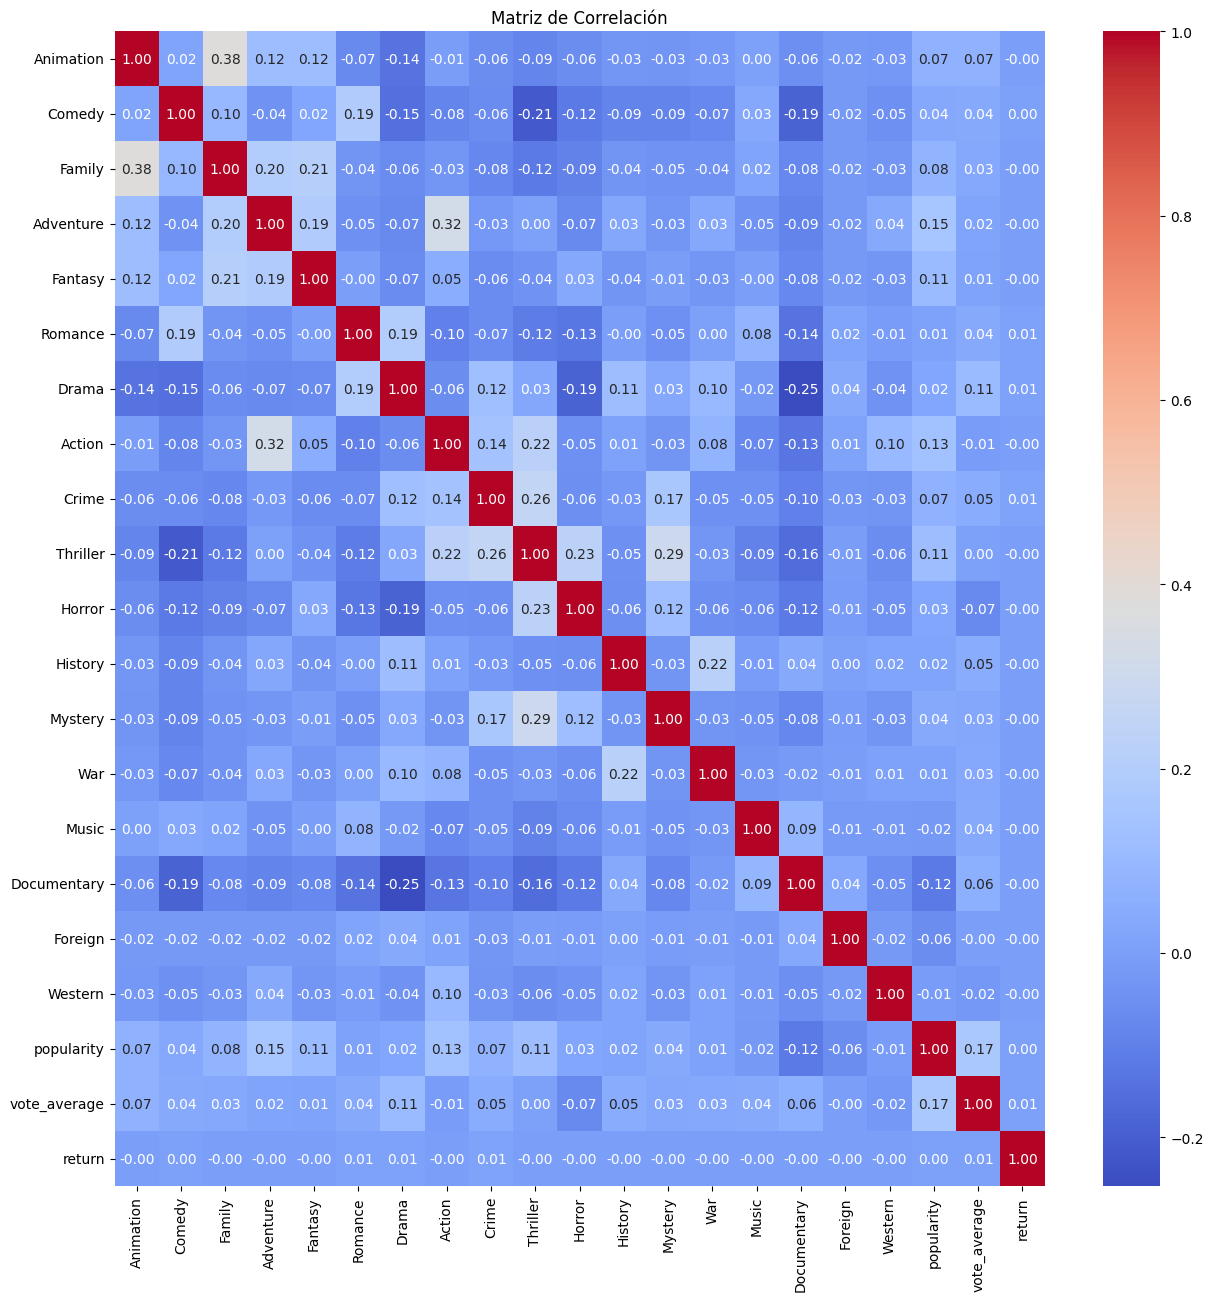

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Etiquetas y título
plt.title('Matriz de Correlación')
plt.show()

In [22]:
#CREAR NUBES DE PALABRA 

In [23]:
cadena_texto = ' '.join(df['overview'])

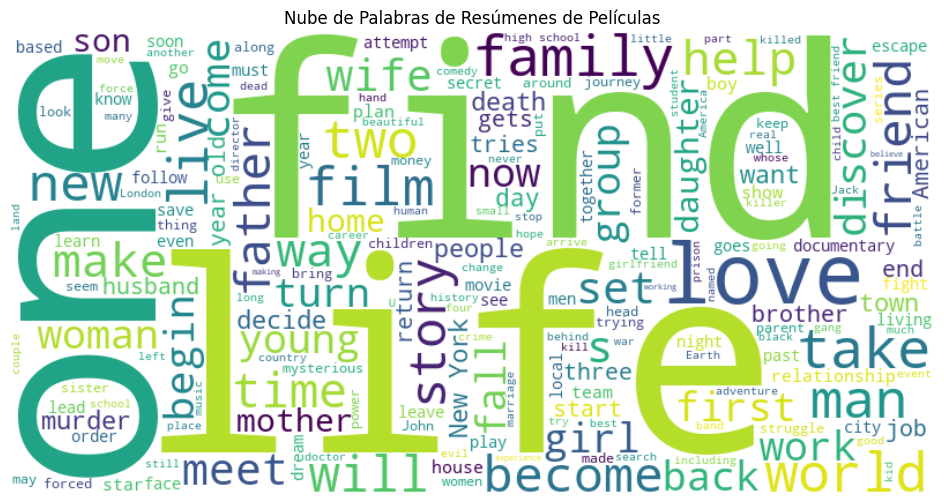

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cadena_texto)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Nube de Palabras de Resúmenes de Películas')
plt.show()

#NO SE OBSERVA CORRELACION ENTRE COLUMNAS, NI TENEMOS UNA BASE DE DATOS CON INFORMACION DE INTERACCIONES USUARIO - PELICULA, TRABAJAREMOS CON UN SISTEMA DE RECOMENDACION BASADO EN CONTENIDO, LO SIGUINETE QUE SE HARA ES REDUCIR EL DATASET PARA QUE SEA MEJOR MANEJADO EN TERMIDOS DE CAPACIDAD DE MEMORIA

In [26]:
df = pd.read_csv('./dataset.csv')

In [27]:
df.shape


(32256, 17)

In [28]:
#Eliminar columnas que no se van a utiliar
df.drop(columns=["id","original_language", "production_companies", "status", "revenue", "budget", "return", "release_date"],  inplace=True)

In [29]:
df.shape

(32256, 9)

In [39]:
por_anio = df["release_year"].value_counts()
por_anio = por_anio.reset_index()
por_anio.columns = ['release_year', 'count']

In [ ]:
por_anio

C:\Users\argen\AppData\Local\Temp\ipykernel_10624\878975738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_year', y='count', data=por_anio, palette='viridis')


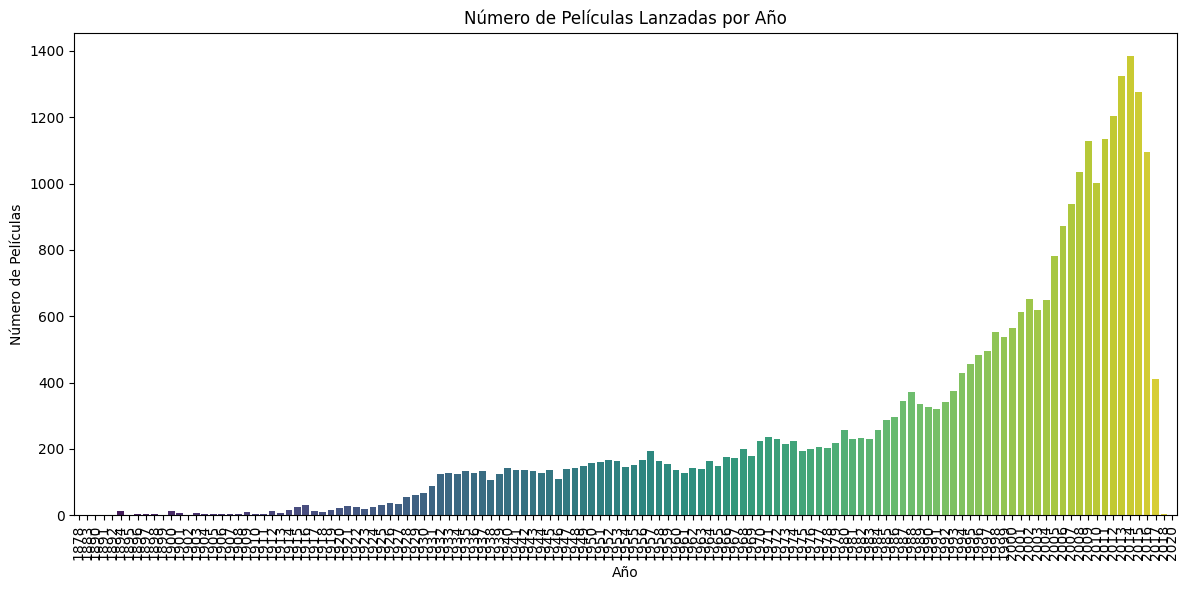

In [42]:

# Graficar el conteo de películas por año usando seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='count', data=por_anio, palette='viridis')
plt.title('Número de Películas Lanzadas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
df= df[df['release_year'] >= 1969]

In [46]:
df.shape

(26173, 9)

In [47]:
df.to_csv('dataset.csv', index=False)